In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['OPENBLAS_NUM_THREADS'] = '4'
os.environ['MKL_NUM_THREADS'] = '4'
from qutip import *

plt.rcParams['figure.figsize'] = [12,8]

def Shor_vs_GNFS(X_min,X_max, scale='linear', Shor_only=0, GNFS_only=0):
    mu = np.linspace(X_min, X_max, 800)
    GNFS = np.exp(mu**(1/3)*(np.log2(mu))**2/3)
    Shor = mu**3
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    if scale == 'log':
        ax.set_yscale('log')
    if not GNFS_only:
        plt.plot(mu, Shor, linewidth=3, label=r"Shor's Algorithm")
    if not Shor_only:   
        plt.plot(mu, GNFS, linewidth=3, label=r"GNFS")
    plt.xlabel(r'Integer Bit-Width')
    plt.ylabel(r'Order of Required Process Steps')
    plt.legend(loc=0)
    plt.show()


Why Blockchain?
=================================

How I learned to love Crypto-Coins and the Blockchain.



* Blockchain developers are probably the largest group outside academia with at least a cursory understanding of the fundamentally game changing power of Quantum Computation.
* All the Important Blockchain protocols are Open Source
* Fascinating history: Bitcoin started with a white paper authored under the pseudonyme Satoshi Nakamoto. To this day we don't know who he is.
* Not corporate owned or controlled. Truly community driven, especially here in Toronto, where the Ethereum blockchain was born.
* Motivated by the ideal that grass-roots technology can improve society. After the death of ideologies the largest movement with a positive utopian outlook that cuts across the political spectrum.
* Bitcoin proved that the underlying protocol works and <a target=_new href="https://bitcoincharts.com/charts/bitstampUSD#rg1460ztgSzm1g10zm2g25zv"> has experienced an immense uptake</a>.  

__But__: The technology relies fundamentally on non-quantum cryptography, and is intently focused on building a unbreakable system that can not be compromised. That is why the threat of Peter Shor's most famous quantum algorithm has not been lost on the Blockchain community. 

Scaling Behaviour
=================================
Shor's Algorithm scales dramatically better than the best know classical algorithm GNFS for the factorization of integers. 

The difference in scaling behaviour is $ O(b^3) $ versus $ O\left(\exp\sqrt[3]{\frac{64}{9} b (\log b)^2}\right) $ .

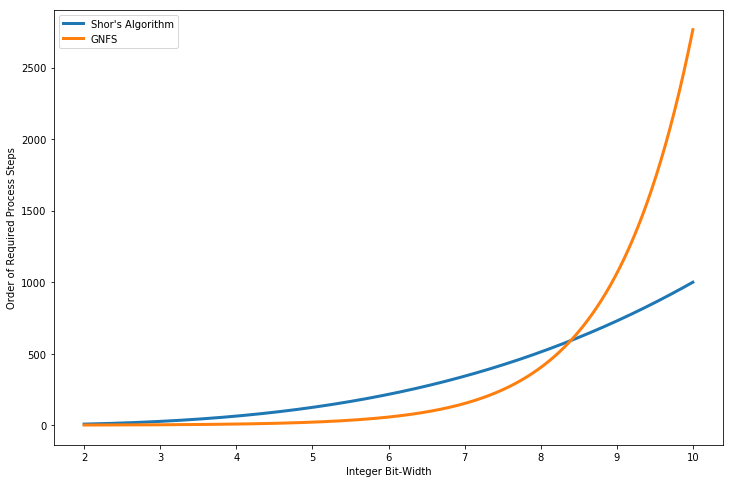

In [8]:
Shor_vs_GNFS(2,10,scale='linear')

A bit width of ten just reaches to the integer $ 2^{10} =  1024 $. When moving further out GNFS looks almost like a vertical ascent when plotted on a linear scale.

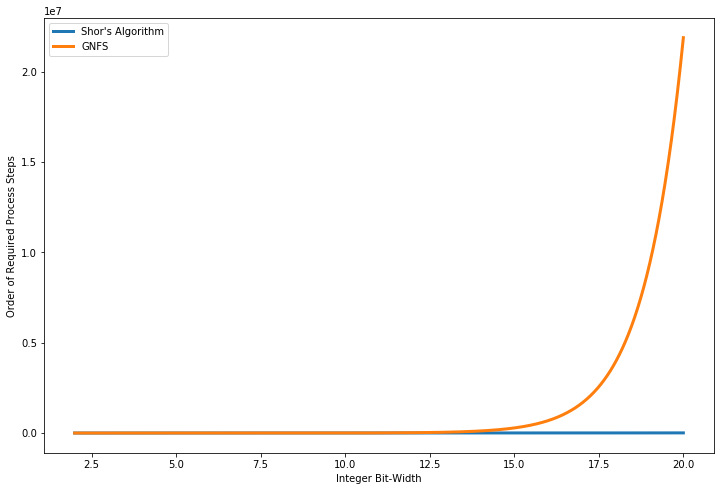

In [9]:
Shor_vs_GNFS(2,20,scale='linear')

__ 2<sup>1061</sup>&nbsp;&minus;&nbsp;1 __, with __1061 bits__ (320 digits) was factored between early 2011 and 4 August 2012 by a group headed by Greg Childers at CSU Fullerton, using the nfs@home [[BOINC]] project for about 300 CPU-years of sieving. 

All unfactored parts of the numbers 2<sup>n</sup>&nbsp;&minus;&nbsp;1 with n between 1000 and 1200 were factored by a multiple-number-sieve approach in which much of the sieving step could be done simultaneously for multiple numbers, by a group including T. Kleinjung, J. Bos and [[A. K. Lenstra]], between 2010 and 2014.

In that region of more practical interest a log scale makes comparison easier.

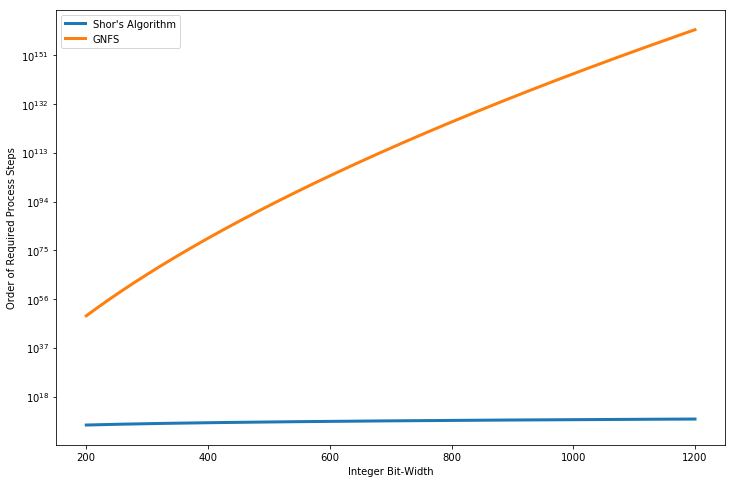

In [10]:
Shor_vs_GNFS(200, 1200,scale='log')

Zooming in: How many more processing steps are required when adding two more bits?

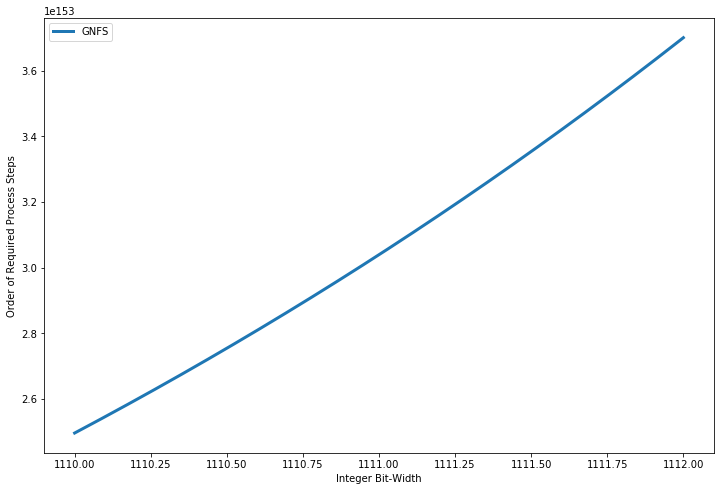

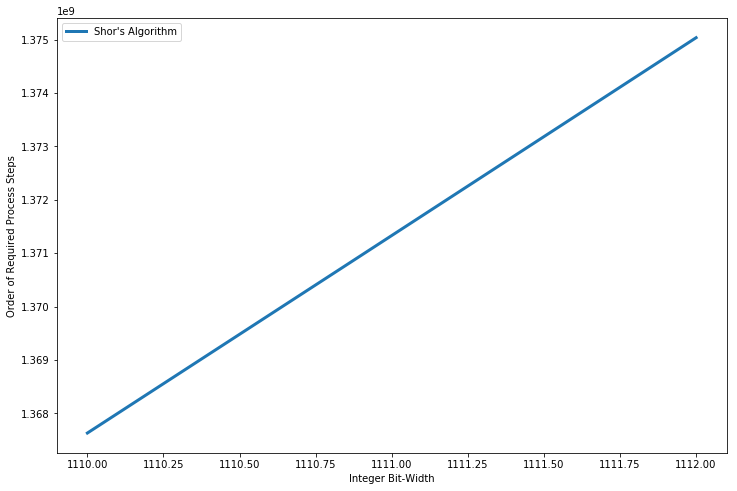

In [11]:
Shor_vs_GNFS(1110, 1112, GNFS_only=1)
Shor_vs_GNFS(1110, 1112, Shor_only=1)

<img src="img/hitchhikers_guide_to_the_galaxy_dont_panic.jpg" style="position: absolute; left: 280px; bottom: 160px; z-Index: 3">

<div class="mark">
Factorization: Size Matters
=================================
The record set in 2012 for Shor's algorithm still stands.

As of writing this Notebook, [the largest number factorized with Shor's algorithm is __21__](http://adsabs.harvard.edu/abs/2012NaPho...6..773M).

This was photonics based. [Ion trap realizations are catching up but made it only to 15 so far](https://scirate.com/arxiv/1507.08852).

But the experiments have their detractors, some researchers are arguing [that these haven't been true implementation's of Shor's algorithm](https://www.semanticscholar.org/paper/Comment-on-Realization-of-a-scalable-Shor-algorith-Cao-Liu/edb06556b7dc87fd91137909dbe35c7106b73261).</div><i class="fa fa-lightbulb-o "></i>

On the other hand there is the intrepid Quantum Computing hardware start-up D-Wave. This company implement a special purpose architecture less liked by theorists, it can't implement Shor's algorithm, but one designed for quantum annealing, with the over thousand qubits on the D-Wave 2 chip [the largest factorization achieved was for the number __200099__](https://www.nextbigfuture.com/2017/01/dwave-adiabatic-quantum-system-can.html) . This was privately sponsored work performed by the 1Qbit staff researchers using the best publicly know Quantum Annealing algorithm for factorization. For each of the numbers the factorized they report that an annealing time of 3.5 sufficed.
<a href="https://dwavesys.com" target=_new> <img src="img/D-Wave_20011-604x270.png" ></a>

The current D-Wave machine again doubled the qubit count which means that 40-bit integers i.e. up to $2^{40} -1 =  1099511627775 $ should be within reach for the current machine. The qubit count scaling for this algorithm is not linear but rather for an n-bit integer $ <span class="mark">2n^2</span> $ qubits are required. 

D-Wave managed to double the qubit count every 16-months in the past - a fact that VC investor Steve Jurvetson exuberantly dubbed Rose's law, after D-Wave co-founder Gordie Rose. (He produced the chart below that did not sit well with some CS theorists). 

<img src="img/rose_law.jpg">

While not faster than the universe, if D-Wave keeps up this rate of qubit doubling, and assuming the current algorithm scales, than 1024-bit RSA keys can be broken within about ten years (this assumes that no better adiabatic algorithms can be found). 

At that point D-Wave would need to integrate more than half a million physical qubits on their chip.

To achieve the same with a universal QC that can execute Shor's algorithm requires "only" about tens of thousands physical qubits.

Fun Fact: The cabinet sized big quantum computer boxes are mostly empty:


<img src="https://i1.wp.com/wavewatching.net/wp-content/uploads/2013/10/geodie_in_box.jpg?w=550">

# What is a Qubit and What Makes Some Better Than Others

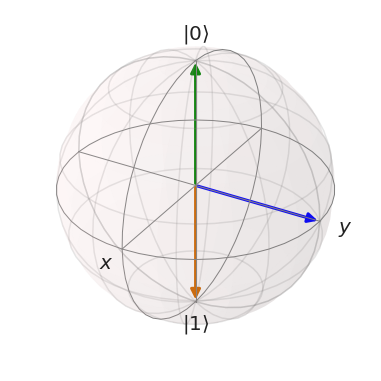

In [66]:
b = Bloch()
b.sphere_alpha=0.1
b.frame_color='grey'
b.font_color='#222222'
#b.sphere_alpha=0
#b.frame_color=b.font_color='white'
up = [0,0,1]
down = [0,0,-1]
b.add_vectors(up)
b.add_vectors(down)
#b.vector_color=['b','r','g','#CC6600']
#y= [0,1,0]
b.add_vectors(y)
b.show()

<img src="img/Bloch_Sphere.svg" style="height: 330px; width: 330px; position: relative; left: -225px; bottom: 0px; z-Index: 3">

$ |\psi\rangle = a |0 \rangle \, + \, b |1 \rangle $ with a,b ∈ ℂ

The square of psi is normalized because it represents a measurement probability. For complex number squaring requires the multiplications with the complex conjugate which is in the Dirac notation denoted as $ \langle \psi | $ , i.e. $ \langle \psi | \psi \rangle = 1 $

With this and some trigonometry the state vector (wavefunction) can be written as: 

$ |\psi\rangle = \cos\left( \frac{\theta}{2} \right) |0 \rangle \, + \, e^{i \phi}  \sin\left( \frac{\theta}{2} \right) |1 \rangle =
\cos\left( \frac{\theta}{2} \right) |0 \rangle \, +  \, ( \cos \phi + i \sin \phi) \, \sin\left(\frac{\theta}{2}\right) |1 \rangle $

## Where Do the Complex Numbers Come From?

All allowed physical operations on a single qubit are rotations (and reflections). Complex numbers are tailor made for rotations.

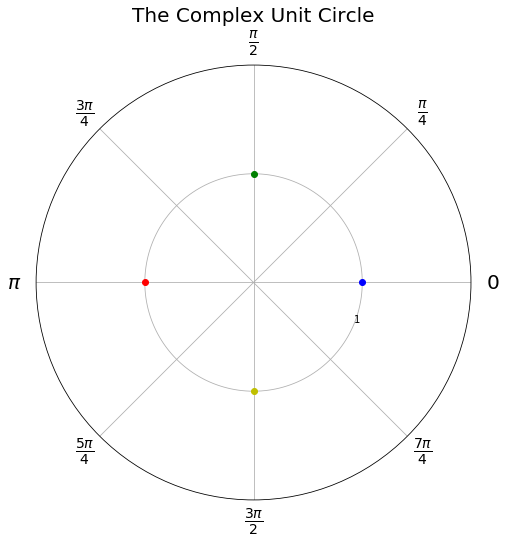

In [55]:
from numpy import pi
#import matplotlib.pyplot as plt
r = np.arange(0, 0.5, 0.01)
theta = 2 * pi * r
ax = plt.subplot(111, projection='polar')
ax.set_rmax(1)
ax.set_rticks([0,1])  # less radial ticks
ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
ax.grid(True)
xT=plt.xticks()[0]
xL=['0',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',\
    r'$\pi$',r'$\frac{5\pi}{4}$',r'$\frac{3\pi}{2}$',r'$\frac{7\pi}{4}$']
plt.xticks(xT, xL, fontsize=20)
ax.plot(0,1,'ob')
ax.plot(pi/2,1,'og')
ax.plot(pi,1,'or')
ax.plot(1.5*pi,1,'oy')
plt.text(0.5, 1.1, "The Complex Unit Circle",
         horizontalalignment='center',
         fontsize=20,
         transform = ax.transAxes)
plt.show()

For instance the following trivial calculation can be understood as a rotation by 90<sup>0</sup> counterclwise around the origin. And any subsequent multiplication with __*1j*__ results in another such rotation until the original value has been retained. Such periodicity of multiplications is a hallmark of the class of algebras that the complex numbers belong to.

In [67]:
1j*1j

(-1+0j)

In [46]:
(-1+0j)*1j

(-0-1j)

In [47]:
(-0-1j)*1j

(1+0j)

This works for any complex number on the unit circle. For instance the one at 45 degrees i.e. $ \pi/4 $.

In [68]:
from sympy import sqrt, simplify
z=sqrt(2)*(1.0 + 1j)/2
print(simplify(z))
print(simplify(z*z))
print(simplify(z*z*z))
print(simplify(z*z*z*z))

0.5*sqrt(2)*(1 + I)
1.0*I
0.5*sqrt(2)*(-1 + I)
-1.00000000000000


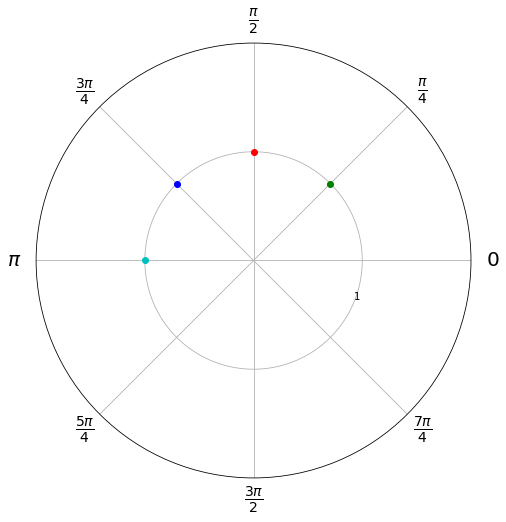

In [58]:
r = np.arange(0, 0.5, 0.01)
theta = 2 * pi * r
ax = plt.subplot(111, projection='polar')
ax.set_rmax(1)
ax.set_rticks([0,1])  # less radial ticks
ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
ax.grid(True)
#ax.set_title("The Complex Unit Circle", va='bottom')
xT=plt.xticks()[0]
xL=['0',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',\
    r'$\pi$',r'$\frac{5\pi}{4}$',r'$\frac{3\pi}{2}$',r'$\frac{7\pi}{4}$']
plt.xticks(xT, xL, fontsize=20)
ax.plot(pi/4,1,'og')
ax.plot(pi/2,1,'or')
ax.plot(3*pi/4,1,'ob')
ax.plot(pi,1,'oc')

plt.show()

## Quantum Computing is All About Rotations on Hyperspheres 

When Schrödinger for the first time created the modern Version of QM he called it __*Wavemechanics*__. That is, it was an attempt to incorporate the wave/particle dualism, that Einstein first suggested when coining the term photon, into the description of matter.

The connection to wave mechanics is due to the projection of rotational quantum dynamics. 

<img style="position:relative; right: 248px" src ="img/Circle_cos_sin.gif" />
There is nothing imaginary about either axis, they are entirley equivilant, yet the name "imaginary" number axis versus the one for the "real" numbers stuck.


_**Fun fact:**_ This is due to these guys, but most of the blame goes to the one to the right.
<img src ="img/EGD.png" />

Descartes and most of his contemporaries very much disliked that there should be a number **_i_** that squares to -1 and he meant the term "imaginary" to be derogatory. In modern lingo he'd probably call them "alternative facts" or "fake numbers". 

Names matter. Gauss and Euler committed a terrible blunder when they kept the term "imaginary". "Complex numbers" isn't much better, both suggested to scores of future students that these numbers are less natural and hard to cope with.

Python these days has complex numbers build in, but prefers the letter _j_. Descart would be most displeased. 


## The True Power of Quantum Computing: Entanglement

When qubits are entangled they have to treated with on state vector on a hypersphere. All that universal Quantum Computers do is rotate (reflect) these state vectors.

Complex numbers can be extended to 4 dimensions using Hamilton's Quaternions which came to him as he walked across Brougham Bridge in Dublin.
They follow his famous equation *i<sup>2</sup> = j<sup>2</sup> = k<sup>2</sup> = ijk = −1*
<img src="img/800px-Broom_bridge_plaque.jpg" />

The 90<sup>0</sup> rotations are as easily "visualized" in 4 Dimension as in 2.
<img src="img/Quaternion2.png" />

In Quantum Mechanics it is customary to work with Pauli matrices $ \sigma_x, \sigma_y, \sigma_z $ which are isomorphic to Quaternions.

$  1 \mapsto I, \quad
  i \mapsto - i \sigma_x, \quad
  j \mapsto - i \sigma_y, \quad
  k \mapsto - i \sigma_z.$
  
Or alternatively

$  1 \mapsto I, \quad
  i \mapsto i \sigma_z, \quad
  j \mapsto i \sigma_y, \quad
  k \mapsto i \sigma_x. $

In [61]:
print(sigmaz())
print(sigmay())
1j*sigmaz()*sigmay()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.+0.j  0.-1.j]
 [ 0.+1.j  0.+0.j]]


Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.  1.]
 [ 1.  0.]]

Projections of simple objects from higher dimensions can created surprisingly complex patterns. Even a simple rotating 4d cube projection (tesseract) is quite intriguing. 

<img src="img/Tesseract.gif" />

In a sense Quantum Computing is like working a n-dim Rubiks cube, where in the end you are on only allowed to read once face of the cube.

## Quantum Annealing the KISS Principle applied to Quantum Computing

A Qubit has to free (analog) parameters. Uncontrolled parameter drift can quickly overwhelm the system and introduce noise that while overwhelm any algorithmic signal. Universal QC requires therefore extraordinary high quality error control. This is made more complicated by the fact that measuring a qubit will destroy its quantum state.

D-Wave on the other hand does not implement ECC on their chip, and use their qubits "in the raw" <a href="https://www.dwavesys.com/tutorials/background-reading-series/quantum-computing-primer" target=_new> for only one specific class of useful problems.</a> <span class="mark">
</span><i class="fa fa-lightbulb-o "></i>

# The Bitcoin Protocol

The Bitcoin protocol does not rely on integer factorization for its key strength. At the time of its publishing 2008 it picked what was then still regarded as a safer successor to the RSA cryptosystem: Elliptic Curve Cryptography (ECC). This despite the fact that the paper on <a href=https://arxiv.org/abs/quant-ph/0301141>Shor's discrete logarithm quantum algorithm for elliptic curves had already been published for five years</a>. 

By 2015 this even <a href=https://threatpost.com/nsas-divorce-from-ecc-causing-crypto-hand-wringing/115150/>forced the NIST to give up on ECC</a>.

Bitcoin is a currency, but in order to achieve that with nothing but data, the Bitcoin protocol needs to solve the problem of securing transactions — making certain people cannot steal from one another, or impersonate one another, etc. In the world of atoms we achieve security with devices such as locks, safes, signatures, and bank vaults. In the world of bits we achieve this kind of security with cryptography. The following description is a very condensed version of <a href=http://www.michaelnielsen.org/ddi/how-the-bitcoin-protocol-actually-works/>Michael Nielsen's excellent blog post on the topic</a>.

The major ingredients of the Bitcoin protocol can be summarized as follows:
1. The digitally-signed message of intent is the "coinage"
2. Each coin/transaction has a unique serial numbers to make them uniquely identifiable
3. Making everyone collectively the bank
4. Proof-of-work
5. Enforcing a Transaction Order

## Digital Signature

A digital signature is the mathematical mechanism of essentially combining a public sequence of numbers with a given digital message. It ensures **non-repudiation**. The sender has no recourse to claim that he did not send the message as long as he kept the signing key private.
<img src="img/digital_signature.png" />

## Unique Serial Numbers

The Bitcoin network keeps track of serial numbers and ensures their uniqueness. It keeps a complete record of which Bitcoin belong to which person. It is like shared public ledger showing all Bitcoin transactions. This ledger is refered to as the Blockchain.

## Making everyone collectively the bank

This is often referred to as a trustless architecture, because we no longer rely on a trusted central bank to verify the coin's validity. Rather when user Alice pays Bob, the latter relies on the Bitcoin network to validate the transaction. That means the protocol needs to ensure that Alice for instance cannot double spend a bitcoin i.e. send to transaction with the same serial number to to users.

One way Alice could try to fool the network is by trying to take it over. Let’s suppose she uses an automated system to set up a large number of separate identities, let’s say a billion. As before, she tries to double spend the same infocoin with both Bob and Charlie. But when Bob and Charlie ask the network to validate their respective transactions, Alice’s sock puppet identities swamp the network, announcing to Bob that they’ve validated his transaction, and to Charlie that they’ve validated his transaction, possibly fooling one or both into accepting the transaction.

The next step is the critical Bitcoin protocol startegy to prevent such an attack from succeeding.

## Proof-of-Work

The idea is counterintuitive and involves a combination of two ideas: (1) to (artificially) make it computationally costly for network users to validate transactions; and (2) to reward them for trying to help validate transactions. The reward is used so that people on the network will try to help validate transactions, even though that’s now been made a computationally costly process. 

The benefit of making it costly to validate transactions is that validation can no longer be influenced by the number of network identities someone controls, but only by the total computational power they can bring to bear on validation. It can be design so that a cheater would need enormous computational resources to cheat, making it impractical.

This process of validation is called **Bitcoin Mining**.

## Transaction Order

One key aspect that gave the protocol its name, is the enforcement of an immutable order.  Without such an order at any given moment it may not be clear who owns what Bitcoin.

To achieve this the Bitcoin protocol require that new transaction data blocks always include a pointer to the last block validated in the chain (in addition to the list of transactions in the block). In practice the pointer is just a hash of the previous block. 

So typically the block chain is just a linear chain of blocks of transactions, one after the other, with later blocks each containing a pointer to the immediately prior block

<img src="img/block_chain.png" />


Occasionally, a fork will appear in the block chain. This can happen, for instance, if by chance two miners happen to validate a block of transactions near-simultaneously – both broadcast their newly-validated block out to the network, and some people update their block chain one way, and others update their block chain the other way:
<img src="img/block_chain_fork.png" />

Fortunately, there is a simple idea that can be used to remove any forks. The rule is this: if a fork occurs, people on the network keep track of both forks. But at any given time, miners only work to extend whichever fork is longest in their copy of the block chain.

Suppose, for example, that we have a fork in which some miners receive block A first, and some miners receive block B first. Those miners who receive block A first will continue mining along that fork, while the others will mine along fork B. Let us suppose that the miners working on fork B are the next to successfully mine a block:
<img src="img/block_chain_extended.png" />


After they receive news that this has happened, the miners working on fork A will notice that fork B is now longer, and will switch to working on that fork. Therefore, in short order work on fork A will cease, and everyone will be working on the same linear chain, and block A can be ignored. Of course, any still-pending transactions in A will still be pending in the queues of the miners working on fork B, and so all transactions will eventually be validated.

# Bitcoin Quantum Computing Vulnerabilities 

First the good news: If a Bitcoin address is truly unused, then any bitcoins lying inside are safe because the associated public key has never been exposed.

However, the challenge is, how do you actually spend the funds? In order to release the bitcoins sent to that address, it is necessary to create a Bitcoin transaction, and that transaction must include a signature and a public key to verify that it was the owner of the private key that signed it. 

By making that transaction, you have just released all of the information that anyone with a sufficiently powerfull quantum computer needs to fully impersonate you, because he can now recover your private key courtesy of Shor's algorithm. 

Without quantum computing, this is impossible, as Bitcoin’s elliptic curve signatures only have enough information to recover the public key, not the private key. 

With quantum computing, elliptic curve signatures only offer an illusion of security.

## Lamport Signatures to the Rescue

Hash value encoding is not amendable to a Shor like attack vector, the worst a quantum computer can do is unleash the Swiss army knife of quantum computing: Grover's algorithm. It is brute force, and can be shown to outperform classical attacks but in a far less dramatic fashion than Shor's algorithm (it only offers a polynomial improvement).

However hashing in itself does not implement a public key system as required by the Bitcoin protocol.

The purpose of a hash functions is to provide you with the mathematical equivalent of a lock. Publishing the hash of a value is similar to putting out a lock in public, and releasing the original value is like opening the lock. However, once the lock is open, it cannot be closed again.

What elliptic curve cryptography provides, and hashing does not, is a way of proving that you have the secret value behind a mathematical lock, and attaching this proof to a specific message, without revealing the original value or even making the proof valid for any other message than the one you attached. 

The Lamport Signature Scheme is a protocol to facilitate this kind of functionality using only hash functions:

Let *k* be a positive integer, and $ P = \{0, 1\}^k $ a set of messages, and $ f:\,Y \rightarrow Z $ a one way function

For $1 \leq i \leq k$ and $j \in \{0,1\}$ the signer chooses $y_{i,j} \in Y$ randomly and computes $z_{i,j} = f(y_{i,j}) $ 

Sending $m = m_1 \ldots m_k \in \{0, 1\}^k$

Signature message: $ \operatorname{sig}(m_1 \ldots m_k) = (y_{1,m_1}, \ldots, y_{k,m_k}) = (s_1, \ldots, s_k) $

Verifying: $ f(s_i) = z_{i,m_i} $ for all $ 1 \leq i \leq k $

# Outlook

Harnessing Quantum Information Resources for Quantum Money. 

It is really <a href=https://en.wikipedia.org/wiki/Quantum_money>a thing</a>.

# Last Words ...
... should belong to <a href=http://physicsworld.com/cws/article/news/2016/mar/04/shors-algorithm-is-implemented-using-five-trapped-ions>the man who's name we heard so many times</a>.